In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_June20.csv


In [2]:
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_June20.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

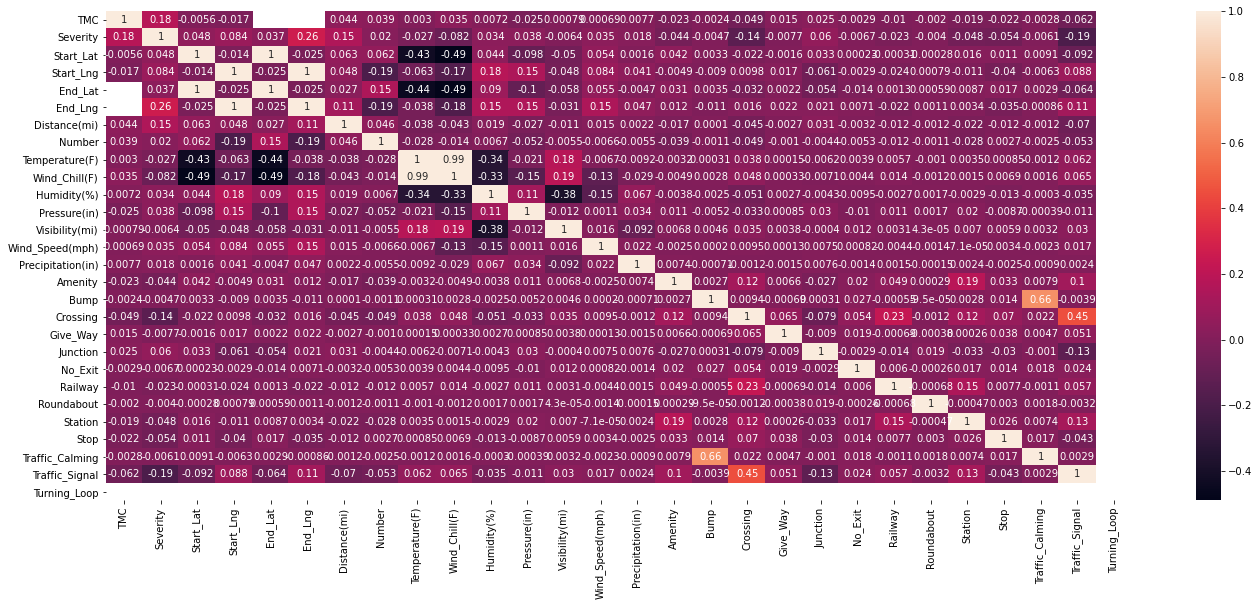

In [4]:
plt.figure(figsize = (23,9))
sns.heatmap(df.corr(), annot = True )

Temperature and Wind_Chill(F) have correlation of 0.99 (should probably just get rid of one cause their basically the same thing). Bump and Traffic_calming have correlation of 0.66 so fairly high. Crossing and Traffic_signal have a correlation of 0.45, no surprise there. Start_Lat has a 100% correlation with End_Lat so I'll get rid of one, same thing with Start_Lng and End_Lng

In [5]:
df.drop(['Wind_Chill(F)', 'End_Lat', 'End_Lng'], axis = 1, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Humidity(%)       

In [7]:
df.count()/3513617  #Lets see the percentage of non-null values for each column

ID                       1.000000
Source                   1.000000
TMC                      0.705489
Severity                 1.000000
Start_Time               1.000000
End_Time                 1.000000
Start_Lat                1.000000
Start_Lng                1.000000
Distance(mi)             1.000000
Description              1.000000
Number                   0.355973
Street                   1.000000
Side                     1.000000
City                     0.999968
County                   1.000000
State                    1.000000
Zipcode                  0.999696
Country                  1.000000
Timezone                 0.998896
Airport_Code             0.998077
Weather_Timestamp        0.987670
Temperature(F)           0.981292
Humidity(%)              0.980167
Pressure(in)             0.984096
Visibility(mi)           0.978411
Wind_Direction           0.983244
Wind_Speed(mph)          0.870615
Precipitation(in)        0.423422
Weather_Condition        0.978331
Amenity       

In [8]:
#It seems like Number is just missing too many values, TMC is also missing a lot but we may be able to feature_engineer it along with other
df.drop(['Number', 'ID'], axis = 1, inplace = True) #ID is also useless to us

In [9]:
df['TMC'].value_counts() #TMC doesn't really correlate with anything and is also a classification meaning we can't really replace any values for it

201.0    2080341
241.0     249852
245.0      40338
229.0      22932
203.0      17639
222.0      13154
244.0      12185
406.0      11109
246.0       7118
343.0       6930
202.0       6298
247.0       4775
236.0       2121
206.0       1274
248.0       1025
339.0        920
341.0        592
336.0         89
200.0         66
239.0         54
351.0          6
Name: TMC, dtype: int64

In [10]:
df.dropna(subset = ['TMC'], inplace = True)

In [11]:
df.isnull().sum()

Source                         0
TMC                            0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    1
Street                         0
Side                           0
City                          51
County                         0
State                          0
Zipcode                      310
Country                        0
Timezone                    2061
Airport_Code                4139
Weather_Timestamp          27770
Temperature(F)             41023
Humidity(%)                43709
Pressure(in)               35146
Visibility(mi)             49005
Wind_Direction             35473
Wind_Speed(mph)           344193
Precipitation(in)        1544502
Weather_Condition          48959
Amenity                        0
Bump                           0
Crossing                       0
Give_Way  

In [12]:
#For Temperature, Humidity, Pressure, Visibility, Wind_speed, and Precipitation we can just get their means
values = {'Temperature(F)': df['Temperature(F)'].mean(), 'Humidity(%)': df['Humidity(%)'].mean(), 'Pressure(in)': df['Pressure(in)'].mean(), 'Visibility(mi)': df['Visibility(mi)'].mean(), 'Wind_Speed(mph)' : df['Wind_Speed(mph)'].mean(), 'Precipitation(in)': df['Precipitation(in)'].mean() }
df.fillna(value = values, inplace = True)
df.isnull().sum()

Source                       0
TMC                          0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
Description                  1
Street                       0
Side                         0
City                        51
County                       0
State                        0
Zipcode                    310
Country                      0
Timezone                  2061
Airport_Code              4139
Weather_Timestamp        27770
Temperature(F)               0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction           35473
Wind_Speed(mph)              0
Precipitation(in)            0
Weather_Condition        48959
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit 

In [13]:
#Okay I think we can just drop everything else now
df.dropna(inplace = True)
df.isnull().sum()

Source                   0
TMC                      0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
T

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424778 entries, 0 to 2478817
Data columns (total 44 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 object 
 1   TMC                    float64
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   Distance(mi)           float64
 8   Description            object 
 9   Street                 object 
 10  Side                   object 
 11  City                   object 
 12  County                 object 
 13  State                  object 
 14  Zipcode                object 
 15  Country                object 
 16  Timezone               object 
 17  Airport_Code           object 
 18  Weather_Timestamp      object 
 19  Temperature(F)         float64
 20  Humidity(%)            float64
 21  Pressure(in)           float64
 22  Visibility(mi)    

In [15]:
#All the twilights seem to be pretty much the same thing so I'll drop them
df.drop(['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis = 1, inplace = True)

In [16]:
df.info() #Okay so lets start making dummy variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424778 entries, 0 to 2478817
Data columns (total 41 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Source             object 
 1   TMC                float64
 2   Severity           int64  
 3   Start_Time         object 
 4   End_Time           object 
 5   Start_Lat          float64
 6   Start_Lng          float64
 7   Distance(mi)       float64
 8   Description        object 
 9   Street             object 
 10  Side               object 
 11  City               object 
 12  County             object 
 13  State              object 
 14  Zipcode            object 
 15  Country            object 
 16  Timezone           object 
 17  Airport_Code       object 
 18  Weather_Timestamp  object 
 19  Temperature(F)     float64
 20  Humidity(%)        float64
 21  Pressure(in)       float64
 22  Visibility(mi)     float64
 23  Wind_Direction     object 
 24  Wind_Speed(mph)    float64
 25  Precipitation(in) 

In [17]:
df['Source'].value_counts()

MapQuest         2362060
MapQuest-Bing      62718
Name: Source, dtype: int64

In [18]:
source = pd.get_dummies(df['Source'])
df = pd.concat([df.drop('Source', axis = 1), source], axis = 1)

Now we make changes with the Time. Thank you to Deepak Deepu for helping me out with this one.

In [19]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors = 'coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors = 'coerce')

df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

df['Duration'] = round((df['End_Time']- df['Start_Time'])/np.timedelta64(1,'m'))

In [20]:
neg_outliers=df['Duration']<=0

df[neg_outliers] = np.nan

df.dropna(subset=['Duration'],axis=0,inplace=True)

In [21]:
df.drop(['Start_Time', 'End_Time'], axis = 1, inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424760 entries, 0 to 2478817
Data columns (total 45 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TMC                float64
 1   Severity           float64
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   Distance(mi)       float64
 5   Description        object 
 6   Street             object 
 7   Side               object 
 8   City               object 
 9   County             object 
 10  State              object 
 11  Zipcode            object 
 12  Country            object 
 13  Timezone           object 
 14  Airport_Code       object 
 15  Weather_Timestamp  object 
 16  Temperature(F)     float64
 17  Humidity(%)        float64
 18  Pressure(in)       float64
 19  Visibility(mi)     float64
 20  Wind_Direction     object 
 21  Wind_Speed(mph)    float64
 22  Precipitation(in)  float64
 23  Weather_Condition  object 
 24  Amenity            float64
 25  Bump              

In [23]:
df['Country'].value_counts()

US    2424760
Name: Country, dtype: int64

In [24]:
#Country is useless because this is only happening in the U.S. Also County and City are just too specific for me to use and have way too many categories
df.drop(['Country', 'County', 'City'], axis = 1, inplace = True)

In [25]:
#Zipcode, Timezone, Airport_Code, Weather_Timestamp are also pretty useless to me
df.drop(['Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp'], axis = 1, inplace = True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424760 entries, 0 to 2478817
Data columns (total 38 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TMC                float64
 1   Severity           float64
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   Distance(mi)       float64
 5   Description        object 
 6   Street             object 
 7   Side               object 
 8   State              object 
 9   Temperature(F)     float64
 10  Humidity(%)        float64
 11  Pressure(in)       float64
 12  Visibility(mi)     float64
 13  Wind_Direction     object 
 14  Wind_Speed(mph)    float64
 15  Precipitation(in)  float64
 16  Weather_Condition  object 
 17  Amenity            float64
 18  Bump               float64
 19  Crossing           float64
 20  Give_Way           float64
 21  Junction           float64
 22  No_Exit            float64
 23  Railway            float64
 24  Roundabout         float64
 25  Station           

In [27]:
#I'm going to use street just so I can see if they were on a highway or not

def location(street):
    if 'I-' in street:
        return 1
    else:
        return 0

df['highway'] = df['Street'].apply(location)
df.drop('Street', axis = 1, inplace = True)

In [28]:
df['highway'].head()

0    1
1    0
2    0
3    1
4    0
Name: highway, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424760 entries, 0 to 2478817
Data columns (total 38 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TMC                float64
 1   Severity           float64
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   Distance(mi)       float64
 5   Description        object 
 6   Side               object 
 7   State              object 
 8   Temperature(F)     float64
 9   Humidity(%)        float64
 10  Pressure(in)       float64
 11  Visibility(mi)     float64
 12  Wind_Direction     object 
 13  Wind_Speed(mph)    float64
 14  Precipitation(in)  float64
 15  Weather_Condition  object 
 16  Amenity            float64
 17  Bump               float64
 18  Crossing           float64
 19  Give_Way           float64
 20  Junction           float64
 21  No_Exit            float64
 22  Railway            float64
 23  Roundabout         float64
 24  Station            float64
 25  Stop              

In [30]:
#State is just too broad to affect the severity of the accident and the description just has the information in the other variables
df.drop(['State', 'Description'], axis = 1, inplace = True)

In [31]:
df['Side'].value_counts()

R    1937081
L     487678
           1
Name: Side, dtype: int64

In [32]:
#There seems to be one random value in side so lets get rid of it and then create dummy variables for it
value = df[(df['Side'] != 'R') & (df['Side'] != 'L')].index
df.drop(value, inplace = True)
df['Side'].value_counts()

R    1937081
L     487678
Name: Side, dtype: int64

In [33]:
sides = pd.get_dummies(df['Side'], drop_first = True)
sides = sides.rename({'R' : 'Side'}, axis = 1)
df = pd.concat([df.drop('Side', axis = 1), sides], axis = 1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424759 entries, 0 to 2478817
Data columns (total 36 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TMC                float64
 1   Severity           float64
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   Distance(mi)       float64
 5   Temperature(F)     float64
 6   Humidity(%)        float64
 7   Pressure(in)       float64
 8   Visibility(mi)     float64
 9   Wind_Direction     object 
 10  Wind_Speed(mph)    float64
 11  Precipitation(in)  float64
 12  Weather_Condition  object 
 13  Amenity            float64
 14  Bump               float64
 15  Crossing           float64
 16  Give_Way           float64
 17  Junction           float64
 18  No_Exit            float64
 19  Railway            float64
 20  Roundabout         float64
 21  Station            float64
 22  Stop               float64
 23  Traffic_Calming    float64
 24  Traffic_Signal     float64
 25  Turning_Loop      

In [35]:
df['Wind_Direction'].value_counts() #Way too many directions, lets just split it up into Calm, North, South, East, West, and Variable

Calm        287367
South       135926
CALM        129403
SSW         127534
West        123313
SW          121051
SSE         117579
WNW         116148
WSW         112160
NW          111428
North       108129
NNW         100942
SE           93835
Variable     90266
NNE          87400
NE           85882
ENE          81645
ESE          81101
East         79091
S            65577
W            49461
N            44808
VAR          37922
E            36791
Name: Wind_Direction, dtype: int64

In [36]:
df['Wind_Direction'] = df['Wind_Direction'].apply(lambda dire: dire[0])
df['Wind_Direction'].value_counts()

S    661502
N    538589
C    416770
W    401082
E    278628
V    128188
Name: Wind_Direction, dtype: int64

In [37]:
wind = pd.get_dummies(df['Wind_Direction'], drop_first = True)
df = pd.concat([df.drop('Wind_Direction', axis = 1), wind], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424759 entries, 0 to 2478817
Data columns (total 40 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TMC                float64
 1   Severity           float64
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   Distance(mi)       float64
 5   Temperature(F)     float64
 6   Humidity(%)        float64
 7   Pressure(in)       float64
 8   Visibility(mi)     float64
 9   Wind_Speed(mph)    float64
 10  Precipitation(in)  float64
 11  Weather_Condition  object 
 12  Amenity            float64
 13  Bump               float64
 14  Crossing           float64
 15  Give_Way           float64
 16  Junction           float64
 17  No_Exit            float64
 18  Railway            float64
 19  Roundabout         float64
 20  Station            float64
 21  Stop               float64
 22  Traffic_Calming    float64
 23  Traffic_Signal     float64
 24  Turning_Loop       float64
 25  Sunrise_Sunset    

In [38]:
df['Weather_Condition'].value_counts().head(30) #Rain (and drizzle), Snow, Thunder (and storm), Cloud (and Overcast), Clear (and Fair), haze (and Smoke and fog) 

Clear                           627934
Mostly Cloudy                   347159
Fair                            319311
Overcast                        294623
Partly Cloudy                   242552
Scattered Clouds                157593
Cloudy                          129119
Light Rain                      122666
Light Snow                       33206
Rain                             28557
Haze                             26664
Fog                              22103
Heavy Rain                       10684
Light Drizzle                     9475
Fair / Windy                      3802
Light Thunderstorms and Rain      3798
Thunderstorm                      3403
Snow                              3399
T-Storm                           2593
Cloudy / Windy                    2469
Mostly Cloudy / Windy             2437
Smoke                             2385
Patches of Fog                    2191
Thunder in the Vicinity           2167
Light Rain with Thunder           2086
Heavy Thunderstorms and R

In [39]:
def weather(kind):
    if 'Rain' in kind or 'Snow' in kind or 'Storm' in kind or 'Thunder' in kind or 'Drizzle' in kind:
        return 'Slippery'
    elif 'Fog' in kind or 'Smoke' in kind or 'Haze' in kind or 'Mist'in kind:
        return 'Vis_obstruct'
    else:
        return 'Fair'
    
weather = df['Weather_Condition'].apply(weather)
weather.value_counts()

Fair            2130522
Slippery         237293
Vis_obstruct      56944
Name: Weather_Condition, dtype: int64

In [40]:
weather_type = pd.get_dummies(weather, drop_first = True)
weather_type.head()

,Slippery,Vis_obstruct
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [41]:
df = pd.concat([df.drop('Weather_Condition', axis = 1) , weather_type], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424759 entries, 0 to 2478817
Data columns (total 41 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TMC                float64
 1   Severity           float64
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   Distance(mi)       float64
 5   Temperature(F)     float64
 6   Humidity(%)        float64
 7   Pressure(in)       float64
 8   Visibility(mi)     float64
 9   Wind_Speed(mph)    float64
 10  Precipitation(in)  float64
 11  Amenity            float64
 12  Bump               float64
 13  Crossing           float64
 14  Give_Way           float64
 15  Junction           float64
 16  No_Exit            float64
 17  Railway            float64
 18  Roundabout         float64
 19  Station            float64
 20  Stop               float64
 21  Traffic_Calming    float64
 22  Traffic_Signal     float64
 23  Turning_Loop       float64
 24  Sunrise_Sunset     object 
 25  MapQuest          

In [42]:
df['Sunrise_Sunset'].value_counts()

Day      1808111
Night     616648
Name: Sunrise_Sunset, dtype: int64

In [43]:
sky = pd.get_dummies(df['Sunrise_Sunset'], drop_first = True)
sky.head()

,Night
0,1
1,1
2,1
3,1
4,0


In [44]:
df = pd.concat([df.drop('Sunrise_Sunset', axis = 1), sky], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424759 entries, 0 to 2478817
Data columns (total 41 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TMC                float64
 1   Severity           float64
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   Distance(mi)       float64
 5   Temperature(F)     float64
 6   Humidity(%)        float64
 7   Pressure(in)       float64
 8   Visibility(mi)     float64
 9   Wind_Speed(mph)    float64
 10  Precipitation(in)  float64
 11  Amenity            float64
 12  Bump               float64
 13  Crossing           float64
 14  Give_Way           float64
 15  Junction           float64
 16  No_Exit            float64
 17  Railway            float64
 18  Roundabout         float64
 19  Station            float64
 20  Stop               float64
 21  Traffic_Calming    float64
 22  Traffic_Signal     float64
 23  Turning_Loop       float64
 24  MapQuest           float64
 25  MapQuest-Bing     

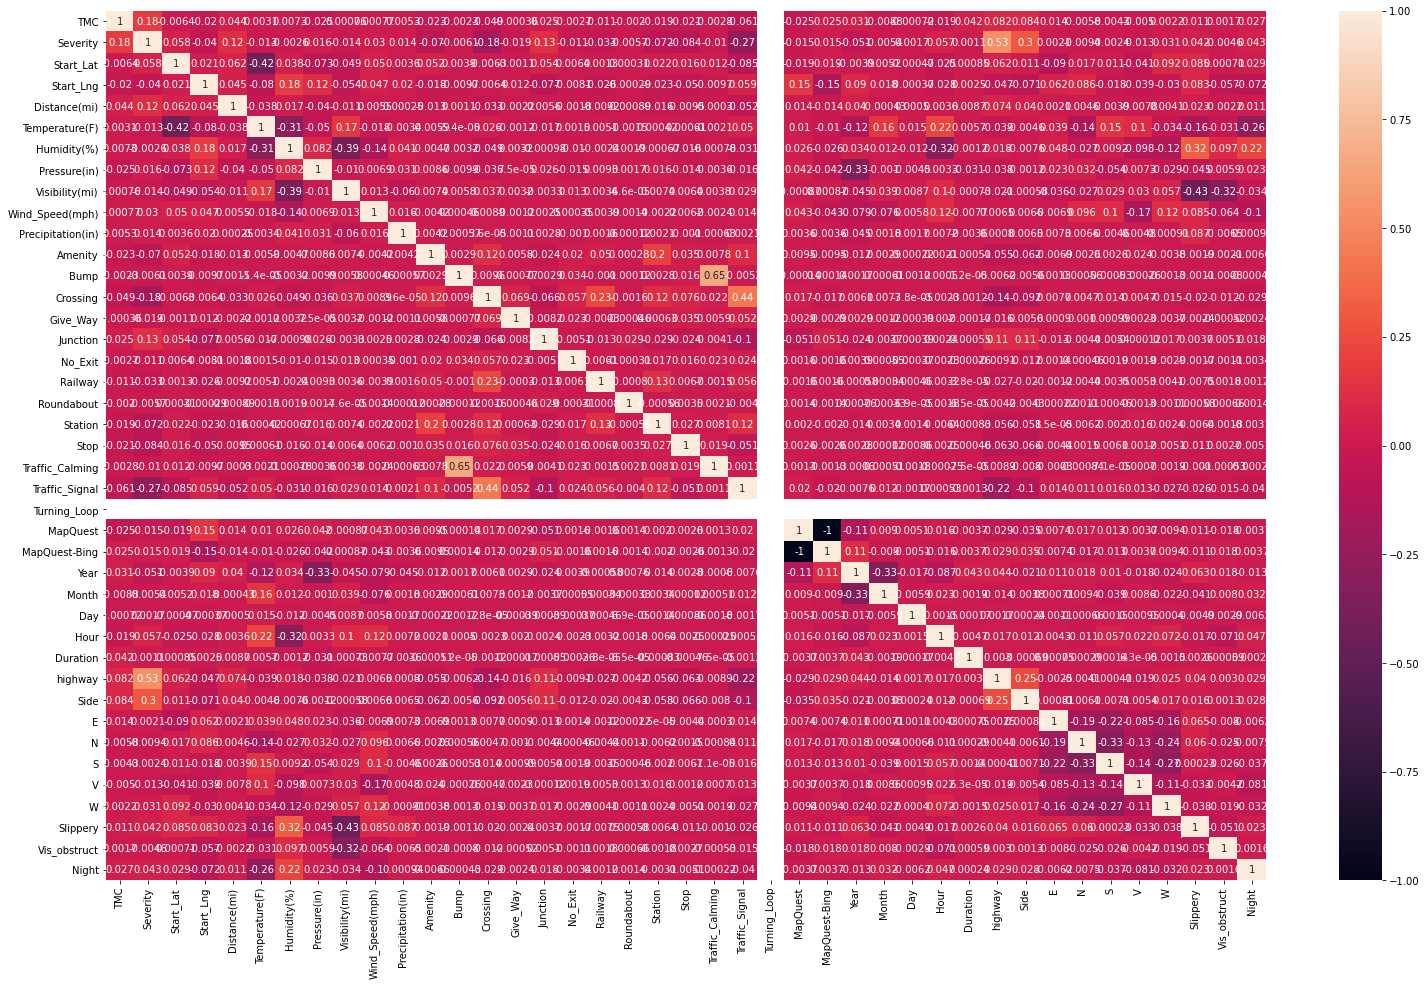

In [45]:
#Now lets see if we can reduce any of the columns by seeing how correlated they are with each other
plt.figure(figsize = (26,16))
sns.heatmap(df.corr(), annot = True)

In [46]:
df['Turning_Loop'].value_counts() #Turning_Loop is just all zeroes so it's useless

0.0    2424759
Name: Turning_Loop, dtype: int64

In [47]:
#It also seems like Visibility and Slippery are correlated also MapQuest and MapQuest_Bing
df.drop(['Turning_Loop', 'Slippery', 'MapQuest-Bing'], axis = 1, inplace = True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424759 entries, 0 to 2478817
Data columns (total 38 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TMC                float64
 1   Severity           float64
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   Distance(mi)       float64
 5   Temperature(F)     float64
 6   Humidity(%)        float64
 7   Pressure(in)       float64
 8   Visibility(mi)     float64
 9   Wind_Speed(mph)    float64
 10  Precipitation(in)  float64
 11  Amenity            float64
 12  Bump               float64
 13  Crossing           float64
 14  Give_Way           float64
 15  Junction           float64
 16  No_Exit            float64
 17  Railway            float64
 18  Roundabout         float64
 19  Station            float64
 20  Stop               float64
 21  Traffic_Calming    float64
 22  Traffic_Signal     float64
 23  MapQuest           float64
 24  Year               float64
 25  Month             

In [49]:
from sklearn.model_selection import train_test_split
X = df.drop('Severity', axis = 1)
y_rfc = df['Severity']
y_nn = df['Severity']

In [50]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X,y_rfc, test_size = 0.3, random_state = 101)

In [51]:
#Because this is Multi-Classification, lets start with Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100)
rfc.fit(X_train_r, y_train_r)

RandomForestClassifier()

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
y_rfc_pred = rfc.predict(X_test_r)

In [53]:
print(confusion_matrix(y_test_r, y_rfc_pred))
print('\n')
print(classification_report(y_test_r, y_rfc_pred))

[[     1    295     26      0]
 [     3 445823  34458      1]
 [     0  58750 185995     34]
 [     0    241   1638    163]]


              precision    recall  f1-score   support

         1.0       0.25      0.00      0.01       322
         2.0       0.88      0.93      0.90    480285
         3.0       0.84      0.76      0.80    244779
         4.0       0.82      0.08      0.15      2042

    accuracy                           0.87    727428
   macro avg       0.70      0.44      0.46    727428
weighted avg       0.87      0.87      0.87    727428



In [54]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [55]:
encoder = LabelEncoder()
encoder.fit(y_nn)
y_nn = encoder.transform(y_nn)
y_nn = to_categorical(y_nn)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y_nn, test_size = 0.3, random_state = 101)

In [57]:
#Lets try Neural Network
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [59]:
model = Sequential()

model.add(Dense(39, activation = 'relu', input_dim = len(df.columns) - 1))
model.add(Dropout(rate = 0.4))

model.add(Dense(20 , activation = 'relu'))
model.add(Dropout(rate = 0.4))

model.add(Dense(10 , activation = 'relu'))
model.add(Dropout(rate = 0.4))

model.add(Dense(4, activation = 'softmax'))


model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [60]:
model.fit(X_train, y_train, epochs = 30, callbacks = [early_stop],batch_size = 256, validation_data = (X_test, y_test))

Epoch 1/30
6631/6631 [==============================] - 17s 3ms/step - loss: 0.5107 - accuracy: 0.7763 - val_loss: 0.4441 - val_accuracy: 0.8061
Epoch 2/30
6631/6631 [==============================] - 17s 3ms/step - loss: 0.4713 - accuracy: 0.7920 - val_loss: 0.4400 - val_accuracy: 0.8074
Epoch 3/30
6631/6631 [==============================] - 17s 3ms/step - loss: 0.4663 - accuracy: 0.7928 - val_loss: 0.4372 - val_accuracy: 0.8067
Epoch 4/30
6631/6631 [==============================] - 18s 3ms/step - loss: 0.4641 - accuracy: 0.7925 - val_loss: 0.4353 - val_accuracy: 0.8083
Epoch 5/30
6631/6631 [==============================] - 17s 3ms/step - loss: 0.4624 - accuracy: 0.7931 - val_loss: 0.4352 - val_accuracy: 0.8065
Epoch 6/30
6631/6631 [==============================] - 19s 3ms/step - loss: 0.4619 - accuracy: 0.7929 - val_loss: 0.4334 - val_accuracy: 0.8080
Epoch 7/30
6631/6631 [==============================] - 18s 3ms/step - loss: 0.4614 - accuracy: 0.7933 - val_loss: 0.4343 - val_ac

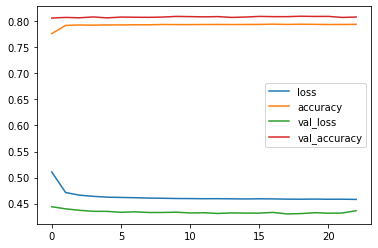

In [61]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [62]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

22733/22733 [==============================] - 27s 1ms/step - loss: 0.4365 - accuracy: 0.8082

accuracy: 80.82%
